<a href="https://colab.research.google.com/github/KineticTenshi/Time-Reversal-in-Acoustics/blob/main/Avalle_Ea_Projet_MethodeNumerique_RetournementTemporel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet

Le projet proposé ici consiste à simuler une expérience de retournement temporel ultrasonore. Nous allons pour cela utiliser un réseau de $2N_r+1$ transducteurs élémentaires de géométrie circulaire immergé dans l'eau. La vitesse de propagation des ondes ultrasonores dans l'eau est $c=1.5$ mm/$\mu$s.

Chaque transducteur est supposé de rayon $a$, les transducteurs sont disposés périodiquement selon l'axe $x$ dans le plan $z=0$. On suppose également que l'espace intersticiel entre deux transducteurs successifs est nul.

### Calcul de la réponse de diffraction d'un transducteur mono-élément

Sous réserve de supposer une vibration en mode piston avec une amplitude uniforme sur toute la surface du disque de rayon $a$ centré en $x=y=z=0$, la réponse impulsionnelle de diffraction au point $(r,z)$ est donnée par la formule suivante :

- si le point est dans l'ombre géométrique du disque diffractant ($r<a$)

$$h(r,z,t)\propto\left\{
\begin{array}{ll}
0 & \mathrm{si~} ct<z \\
1 & \mathrm{si~} z<ct<\sqrt{z^2+(a-r)^2} \\
\displaystyle\frac{1}{\pi}\cos^{-1}\left(\frac{r^2+c^2t^2-z^2-a^2}{2r\sqrt{c^2t^2-z^2}}\right)
& \mathrm{si~} \sqrt{z^2+(a-r)^2}<ct<\sqrt{z^2+(a+r)^2} \\
0 & \mathrm{si~} \sqrt{z^2+(a+r)^2}<ct \\
\end{array}
\right.
$$

- si le point est en dehors de l'ombre géométrique du disque diffractant ($r>a$)

$$h(r,z,t)\propto\left\{
\begin{array}{ll}
0 & \mathrm{si~} ct<\sqrt{z^2+(a-r)^2} \\
\displaystyle\frac{1}{\pi}\cos^{-1}\left(\frac{r^2+c^2t^2-z^2-a^2}{2r\sqrt{c^2t^2-z^2}}\right)
& \mathrm{si~} \sqrt{z^2+(a-r)^2}<ct<\sqrt{z^2+(a+r)^2} \\
0 & \mathrm{si~} \sqrt{z^2+(a+r)^2}<ct \\
\end{array}
\right.
$$

Calculer et représenter graphiquement $h(r,t)$ pour un transducteur de diamètre $2a=5$ mm pour un point d'observation situé dans le plan $z=10$ mm et variant entre $r=0$ mm et $r=5$ mm. On veillera à évaluer les paramètres d'échantillonnage temporel pertinents.

Pour la représentation graphique on pourra utiliser
- un graphique 3D $(r, t, h(r,t))$
- un graphique en courbes de niveaux
- un graphique avec quelques points particuliers de l'espace choisis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccos


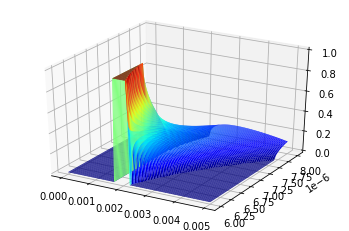

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from scipy import *
from math import *
from mpl_toolkits.mplot3d import Axes3D

N = 100                      #taille matrice h_T
a = np.array([2.5*10**(-3)]) #en m
c = np.array([1.5*10**3])    #en m.s-1
z = np.array([10*10**(-3)])  #en m

################################################################################
#représentation graphique 3D de h(r,t) pour un transducteur de 2a = 5mm
################################################################################

r = np.linspace(0, 5, N).reshape(N, 1)*(10**(-3)) #r variant de 0 à 5 mm en colonne
t = np.linspace(6, 8, N)*(10**(-6))               #t en ligne

def H(r, z, t, ligne, colonne):
  h_r = np.zeros((ligne, colonne))
  h_r = np.where((r<a) & (c*t<z), 0, h_r)
  h_r = np.where((r<a) & (z<c*t) & (c*t<np.sqrt(z**2+(a-r)**2)), 1, h_r)
  h_r = np.where((np.sqrt(z**2+(a-r)**2)<c*t) & (c*t<np.sqrt(z**2+(a+r)**2)), 1/np.pi*np.arccos((r**2+(c*t)**2-z**2-a**2)/(2*r*np.sqrt((c*t)**2-z**2))), h_r)
  h_r = np.where(np.sqrt(z**2+(a+r)**2)<c*t, 0, h_r)
  h_r = np.where((r>a) & (c*t<np.sqrt(z**2+(a-r)**2)), 0, h_r)
  return h_r

h_r = H(r, z, t, N, N)

R, T = np.meshgrid(r, t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(R, T, h_r, rstride=1, cstride=1, cmap='jet', edgecolor='none')

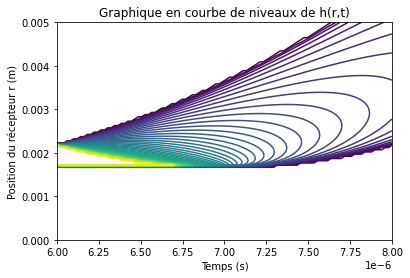

In [ ]:
################################################################################
#représentation graphique de h(r,t) en courbes de niveaux
################################################################################

plt.contour(T, R, h_r, 50) #50 lignes de niveaux
plt.title("Graphique en courbe de niveaux de h(r,t)")
plt.ylabel('Position du récepteur r (m)')
plt.xlabel('Temps (s)')
plt.show()

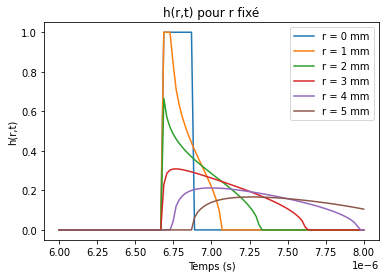

In [ ]:
################################################################################
#représentation de h(t) pour différentes valeurs de r
################################################################################

plt.plot(t, h_r[0, :], label='r = 0 mm')
plt.plot(t, h_r[20, :], label='r = 1 mm')
plt.plot(t, h_r[40, :], label='r = 2 mm')
plt.plot(t, h_r[60, :], label='r = 3 mm')
plt.plot(t, h_r[80, :], label='r = 4 mm')
plt.plot(t, h_r[99, :], label='r = 5 mm')
plt.title('h(r,t) pour r fixé')
plt.xlabel('Temps (s)')
plt.ylabel('h(r,t)')
plt.legend()
plt.show()

La formule précédente correspond à une formulation impulsionnelle de la diffraction. Par ailleurs la quantité $h(r,t)$ correspond à un potentiel de vitesse, qui n'est pas une grandeur physique observable.

En pratique on fonctionne en régime transitoire avec un signal d'entrée $e(t)$. Dans ce cas la pression acoustique mesurable est donnée par
$$p(r,t)\propto e(t)\frac{\ast}{t}\frac{\partial h(r,t)}{\partial t}$$

Pour le signal d'entrée on pourra considérer une fonction monochromatique à la fréquence centrale $f_c=2$ MHz et une bande passante de 100%, comme calculée lors de la séance portant sur l'analyse spectrale.

Calculer et représenter graphiquement $p(r,t)$.

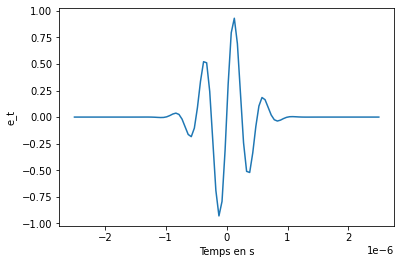

In [ ]:
################################################################################
#calcul de l'impulsion e(t) avec bande passante à 100%
################################################################################

f_c = 2*10**6                                   #fréquence centrale en Hz
f_e = 20*10**6                                  #fréquence d'échantillonage en Hz
alpha = np.pi/log(2)*(f_c/2)**2                 #facteur dans l'exponentielle
delta_t = 1/f_e                                 #jsp ce que c'est mais ok on en a besoin
t_impulsion = np.linspace(-N/2, N/2, N)*delta_t #fenêtre temporelle de l'impulsion

e_t = np.sin(2*np.pi*f_c*t_impulsion)*np.exp(-alpha*t_impulsion**2)

plt.plot(t_impulsion, e_t)
plt.xlabel('Temps en s')
plt.ylabel('e_t')
plt.show()

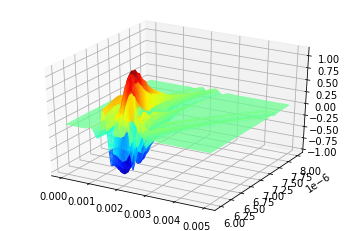

In [ ]:
################################################################################
#calcul du produit de convolution de h_r et e pour obtenir p
################################################################################

d_h = np.gradient(h_r, axis=1)
p_t = np.zeros((N, N))
for i in range(N):
  p_t[i,:] = np.convolve(e_t, d_h[i,:], 'same')

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(R, T, p_t, rstride=1, cstride=1, cmap='jet', edgecolor='none')

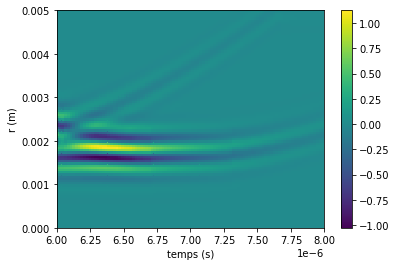

In [ ]:
################################################################################
#graphique en courbes de niveaux
################################################################################

plt.pcolor(T, R, p_t)
plt.colorbar()
plt.xlabel("temps (s)")
plt.ylabel("r (m)")
plt.show()

### Calcul du champ reçu en provenance d'une source ponctuelle

On positionne une source ponctuelle en avant du réseau de transducteurs, en $r=r_s$ et $z=z_s=10$ mm. Cette source émet une impulsion brève (du genre $e(t)$) et le réseau de transducteurs est utilisé en mode réception, chaque élément recevant un signal temporel spécifique.

Par application du principe de réciprocité, le champ créé par la source et mesuré par un transducteur est identique au champ qu'aurait généré ce transducteur mesuré à la position de la source.

Calculer et représenter graphiquement la série de signaux temporels mesurés par le réseau de transducteurs en fonction de la position de la source ponctuelle.

On pourra considérer $N_r=16$, ce qui correspond à un réseau de 33 transducteurs élémentaires. On réduit le rayon des transducteurs à 0.5 mm. On veillera à assurer que les réponses impulsionnelles de diffraction sont non nulles sur au minimum 2 échantillons temporels.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccos


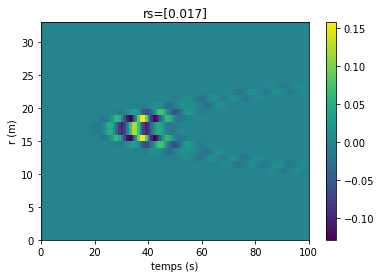

In [ ]:
################################################################################
#recalcul de h(r,t) puis convolution
################################################################################

a = np.array([0.5*10**(-3)])                     #en m
N_r = 16                                         #d'après énoncé
r_trans = np.linspace(0, (2*N_r+1)*2*a, 2*N_r+1) #réseau de transducteur
r_trans = r_trans.reshape(2*N_r+1, 1)            #reshape en colonne
r_s = np.array([1.7*10**(-2)])                   #position source en m
new_r = np.absolute(r_trans-r_s)                 #calcul distances pour chaque source

new_h_r = H(new_r, z, t, 2*N_r+1, N)

new_d_h = np.gradient(new_h_r, axis = 1)
new_p_t = np.zeros((2*N_r+1, N))
for i in range(2*N_r+1):
  new_p_t[i, :] = np.convolve(e_t, new_d_h[i, :], 'same')

plt.pcolor(new_p_t)
plt.colorbar()
plt.xlabel("temps (s)")
plt.ylabel("r (m)")
plt.title("rs="+str(r_s))
plt.show()

### Retournement temporel du champ reçu

Les systèmes piézo-électriques peuvent fonctionner aussi bien en réception qu'en émission. On va donc utiliser la série de signaux mesurés par notre réseau de transducteurs en provenance de la source initiale pour automatiquement refocaliser le champ vers cette position.

Pour cela on retourne temporellement chacun des signaux reçus, ces signaux après retournement temporel seront par la suite utilisés comme sources d'émission voie par voie.

Calculer et représenter les signaux retournés temporellement.

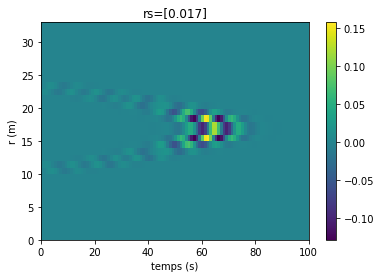

In [ ]:
################################################################################
#retournement temporel de new_p_t -> échange des colonnes
################################################################################
new_p_t_retourne = np.zeros((2*N_r+1, N))
for i in range(N):
  new_p_t_retourne[:, i] = new_p_t[:, N-i-1]

plt.pcolor(new_p_t_retourne)
plt.colorbar()
plt.xlabel("temps (s)")
plt.ylabel("r (m)")
plt.title("rs="+str(r_s))
plt.show()

### Calcul du champ focalisé

Pour un point situé en avant du réseau (on pourra dans un premier temps se positionner dans le plan $z=z_s$ de la source initiale), calculer le champ rayonné par le réseau de transducteurs après retournement temporel des signaux reçus au cours de la première étape.

Représenter en fonction de la position du point de calcul l'amplitude maximale du champ de pression.
On pourra examiner plus précisément deux directions particulières d'exploration du champ :
- parallèlement au réseau de transducteurs, dans le plan $z=z_s$ de la source initiale
- perpendiculairement au réseau de transducteurs, selon la droite $x=x_s$ de la source initiale

Retrouver l'effet de la focalisation ; quelle est la forme de la tâche focale ?

On pourra également faire une exploration 2D du champ diffracté dans le plan $(x,z)$ autour de la position de la source initiale $(x_s, z_s)$.

Les calculs peuvent rapidement être un peu longs, on pourra clairement tirer avantage du calcul parallèle.

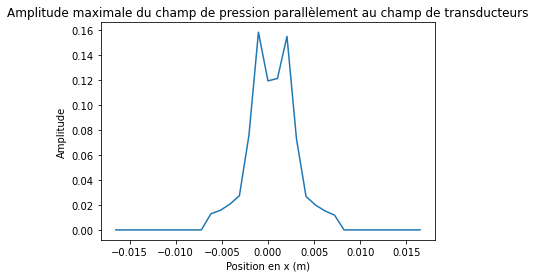

In [ ]:
################################################################################
#amplitude maximale du champ de pression en fonction du transducteur dans plan z
################################################################################

amp_max = np.absolute(new_p_t).max(axis = 1)
x_trans = np.linspace(-(2*N_r+1)*a, (2*N_r+1)*a, 33)

plt.plot(x_trans, amp_max)
plt.xlabel("Position en x (m)")
plt.ylabel("Amplitude")
plt.title("Amplitude maximale du champ de pression parallèlement au champ de transducteurs")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccos


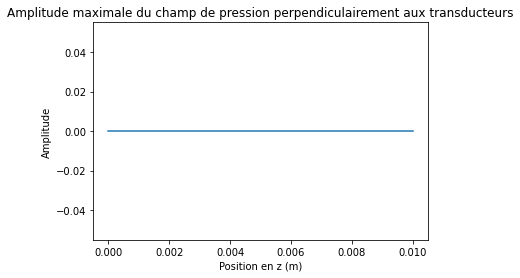

In [ ]:
################################################################################
#amplitude maximale du champ de pression en fonction du transducteur dans plan x
################################################################################

new_z = np.linspace(0, 10, N).reshape(N, 1)*10**(-3) #cette fois on fait varier z de 0 à 10 mm en colonne

h_r_x = H(r_s, new_z, t, N, N)

d_h_x = np.gradient(h_r_x, axis = 1)
p_t_x = np.zeros((N, N))
for i in range(N):
  p_t_x[i, :] = np.convolve(e_t, d_h_x[i, :], 'same')

amp_max_x = np.absolute(p_t_x).max(axis = 1)

plt.plot(new_z, amp_max_x)
plt.xlabel("Position en z (m)")
plt.ylabel("Amplitude")
plt.title("Amplitude maximale du champ de pression perpendiculairement aux transducteurs")
plt.show()

In [ ]:
print(np.shape(h_r_x))
print(np.shape(d_h_x))
print(np.shape(p_t_x))
print(np.sum(h_r[0, :]))
print(np.sum(H(0.017, 0.005, t, 1, N)))
print(np.sum(h_r_x))

(100, 100)
(100, 100)
(100, 100)
10.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccos


### Forme de la tâche focale

Théoriquement, on peut prévoir que la tâche focale a parallèlement au réseau de trasducteurs une taille proportionnelle à
$$\lambda \frac{F}{O}$$
où
- $\lambda$ est la longueur d'onde
- $F$ est la distance focale (profondeur de la source initiale)
- $O$ est l'ouverture de la surface diffractante (ouverture totale du réseau de transducteurs

Imaginer une expérience numérique permettant de vérifier cette propriété.


In [ ]:
p = np.array([0.5, 0.33, 0.1394, 0.029988, 0.000612])
p_s = np.sum(p)

n = np.linspace(1,5,5)

E = np.sum((n*p))

print(E)
print(p_s)

1.7012120000000004
1.0
